In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\abira\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
path = os.listdir('C:/Users/abira/Downloads/archive (3)/Training')
classes = {'no_tumor':0,'pituitary_tumor':1,'meningioma_tumor':2,'glioma_tumor':3}

In [3]:
import cv2
x=[]
y=[]
for cls in classes:
    pth='C:/Users/abira/Downloads/archive (3)/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

In [4]:
np.unique(y)

array([0, 1, 2, 3])

In [5]:
x=np.array(x)
y=np.array(y)

In [6]:
pd.Series(y).value_counts()

1    827
3    826
2    822
0    395
dtype: int64

In [7]:
x.shape

(2870, 200, 200)

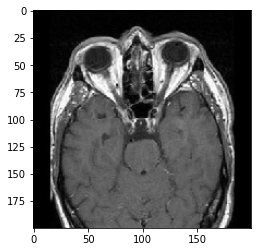

In [8]:
plt.imshow(x[0],cmap='gray')

In [9]:
x_updated = x.reshape(len(x),-1)
x_updated.shape

(2870, 40000)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_updated,y,random_state=42,test_size=0.20)

In [11]:
x_train.shape,x_test.shape

((2296, 40000), (574, 40000))

In [12]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

x_train=x_train/255
x_test=x_test/255

print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.svm import SVC

In [14]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [27]:
print('training score:',sv.score(x_train,y_train))
print('testing score:',sv.score(x_test,y_test))

training score: 0.9390243902439024
testing score: 0.8466898954703833


In [16]:
pred=sv.predict(x_test)


In [17]:
pred[55]

3

In [18]:
pred[54]

1

In [24]:
dec = {0:'No Tumor',1:'glioma Tumor',2:'meningioma_tumor',3:'glioma_tumor'}

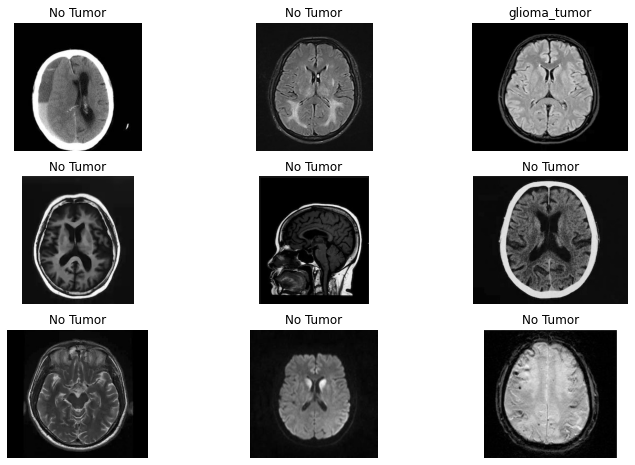

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir("C:/Users/abira/Downloads/archive (3)/Testing/")
c=1
for i in os.listdir("C:/Users/abira/Downloads/archive (3)/Testing/no_tumor")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("C:/Users/abira/Downloads/archive (3)/Testing/no_tumor/"+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

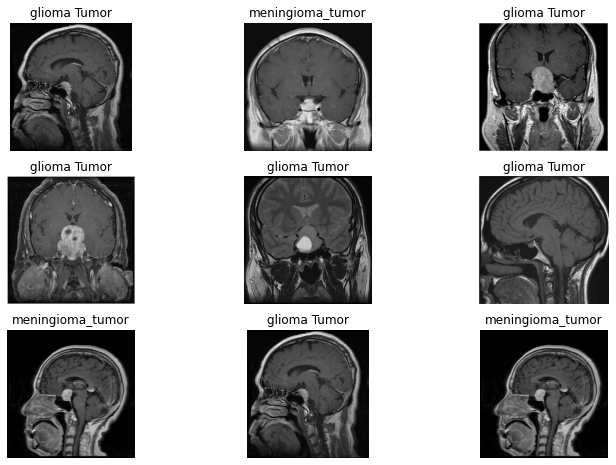

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir("C:/Users/abira/Downloads/archive (3)/Testing/")
c=1
for i in os.listdir("C:/Users/abira/Downloads/archive (3)/Testing/pituitary_tumor/")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("C:/Users/abira/Downloads/archive (3)/Testing/pituitary_tumor/"+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1